# Ejemplo de uso de CNN
# en los datos de MNIST

leemos los datos

In [1]:
from keras.datasets import mnist

# descargamos separados en entrenamiento y tes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# tamaño de los datos
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Vemos una imagen

5


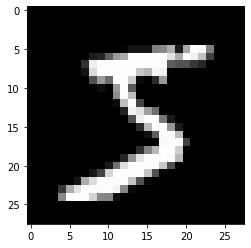

In [4]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0,:,:],cmap='gray')

# Mostramos la etiqueta de la imagen
print(y_train[0])

Reordenamos los datos para que tengan 
(Nº muestras, alto, lado, canales)

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Separamos train y test

In [6]:
X_train = X_train[0:1000,:,:,:]
X_test = X_test[0:1000,:,:,:]
y_train = y_train[0:1000]
y_test = y_test[0:1000]

In [7]:
print(X_train.shape)
print(y_train.shape)

(1000, 28, 28, 1)
(1000,)


Hacemos el one-hot encoding a las salidas

In [8]:
from keras.utils import to_categorical

# me guardo los y_train antes de hacer el one-hot
y_train_old = y_train

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train.shape)

(1000, 10)


In [10]:

y_train.dtype

dtype('float32')

In [11]:
# Lo que antes era 
print(y_train_old[0,])
# Ahora es
print(y_train[0,:])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Definimos el modelo

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D

# Usamos un modelo secuencial
model = Sequential()

# ponemos dos capas de convolución, una flatten y una densa
model.add(Conv2D(40, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'))
#model.add(Dropout(0.5))
model.add(Conv2D(30, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(2))
model.add(Conv2D(20, kernel_size=3, activation='relu'))
#model.add(Conv2D(32, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 40)        400       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 30)        10830     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 30)        120       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 20)        5420      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9680)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                96810     
Total params: 113,580
Trainable params: 113,520
Non-trainable params: 60
_______________________________________________

Se compila el modelo poniendo el optimizador, la funcióón de perdidas y si queremos una métrica

In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'],)

Entrenamos...

In [35]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 15ms/step - loss: 1.5823 - accuracy: 0.5178 - val_loss: 0.6625 - val_accuracy: 0.8580
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.1188 - accuracy: 0.9653 - val_loss: 0.5140 - val_accuracy: 0.8670
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9900 - val_loss: 0.3244 - val_accuracy: 0.9160
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0141 - accuracy: 0.9981 - val_loss: 0.2865 - val_accuracy: 0.9150
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.2843 - val_accuracy: 0.9210
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.9240
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.9240
Epoch 8/200


Evaluamos en test

In [25]:
score = model.evaluate(X_test,y_test)
score

32/32 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.9320


[0.38665971159935, 0.9319999814033508]

Ploteamos la evolución

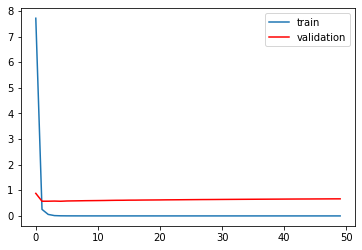

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()


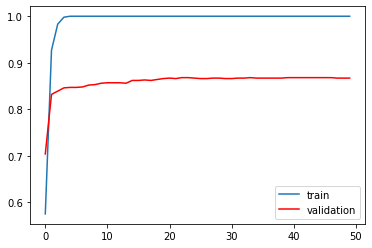

In [ ]:
# Evolucion en accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],'r',label='validation')
plt.legend()


# Aplicamos en test

In [ ]:
# Predecimos en test
preds_test = model.predict(X_test)

['p(y=0|x) = 0.0000', 'p(y=1|x) = 0.0000', 'p(y=2|x) = 0.0000', 'p(y=3|x) = 0.9997', 'p(y=4|x) = 0.0000', 'p(y=5|x) = 0.0000', 'p(y=6|x) = 0.0000', 'p(y=7|x) = 0.0000', 'p(y=8|x) = 0.0003', 'p(y=9|x) = 0.0000']


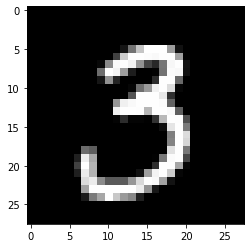

In [ ]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 90
# Mostramos la imagen
plt.imshow(np.squeeze(X_test[idx_mostrar,:,:,]),cmap="gray")
# Mostramos las probabilidades que da el modelo a cada clase
print(["p(y=%d|x) = %.4f"%(i,p) for i,p in enumerate(preds_test[idx_mostrar])])